## Obtaining the Efficient Frontier - Part I

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We are in the middle of a set of 3 Python lectures that will help you reproduce the Markowitz Efficient Frontier. Let’s split this exercise into 3 parts and cover the first part here.

Begin by extracting data for Walmart and Facebook from the 1st of January 2014 until today.

In [67]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'META']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.download(a, start='2014-01-01', auto_adjust=False)['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe.

In [68]:
pf_data.tail()

,WMT,META
Date,,
2025-11-03,101.589996,637.710022
2025-11-04,102.269997,627.320007
2025-11-05,101.470001,635.950012
2025-11-06,101.680000,618.940002
2025-11-07,102.589996,621.710022


<Axes: xlabel='Date'>

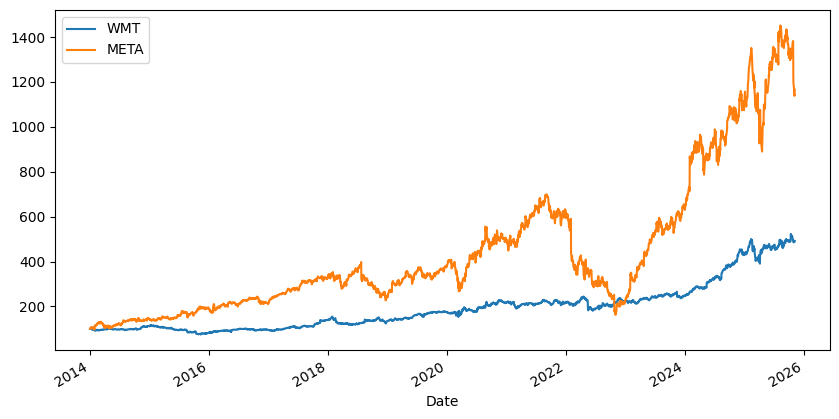

In [69]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

Biểu đồ so sánh giá cổ phiếu của WMT và META bằng cách chuẩn hóa giá trị của chúng về mức 100 tại ngày đầu tiên (2014-01-01).

Hiệu suất vượt trội: Đường giá META cho thấy hiệu suất tăng trưởng vượt trội và liên tục trong suốt giai đoạn 2014−2022. Tuy nhiên từ 2022-2023 lại đột ngột giảm mạnh. Sau đó bắt đầu từ năm 2023 lại bắt đầu tăng trưởng cao trở lại cho đến hiện tại(2025)

Hiệu suất thấp: Đường giá WMT cho thấy sự tăng trưởng tăng chậm hơn META rất nhiều

Calculate their logarithmic returns.

In [70]:
log_returns = np.log(pf_data / pf_data.shift(1))

Create a variable that carries the number of assets in your portfolio.

In [71]:
num_assets = len(assets)

In [72]:
num_assets

2

The portfolio need not be equally weighted. So, create a variable, called “weights”. Let it contain as many randomly generated values as there are assets in your portfolio. Don’t forget these values should be neither smaller than 0 nor equal or greater than 1! <br />

*Hint: There is a specific NumPy function that allows you to generate such values. It is the one we used in the lecture - NumPy.random.random().*

In [73]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.1743323, 0.8256677])

Sum the obtained values to obtain 1 – summing up the weights to 100%!

In [74]:
weights[0] + weights[1]

np.float64(0.9999999999999999)

Kết quả của đoạn mã là một mảng đã được chuẩn hóa, đại diện cho phân bổ vốn ngẫu nhiên cho một danh mục đầu tư:

array([0.1743323, 0.8256677])
Tổng Trọng số: 0.1743323+0.8256677=1.0

Phân bổ Cổ phiếu:

Trọng số 1 (0.1743323): Danh mục này phân bổ khoảng 17.43% vốn vào tài sản thứ nhất (cổ phiếu WMT).

Trọng số 2 (0.8256677): Danh mục phân bổ khoảng 82.57% vốn vào tài sản thứ hai (cổ phiếu FB).

Kết luận: Mảng này đại diện cho một trong vô số danh mục đầu tư ngẫu nhiên có thể được tạo ra từ hai cổ phiếu WMT và FB, trong đó phần lớn vốn được dồn vào cổ phiếu WMT. Trong quá trình mô phỏng Đường biên hiệu quả, hàng ngàn (hoặc hàng chục ngàn) bộ trọng số ngẫu nhiên như thế này sẽ được tạo ra để tìm ra các danh mục đầu tư tối ưu nhất.

*****

Save this document! The next 2 exercises will build on the code you just created!